# **Module 4 Project - Human Protein Image Classification**

* Student name: **Alex Husted**
* Student pace: **Online Full Time - April Cohort**
* Scheduled project review date/time: **Thursday August 22**
* Instructor name: **Rafael Carrasco**
* Blog post URL: **Work in Progress**

# **Project Overview**

This notebook represents the final project in Module 4 of Flatiron's Data Science Bootcamp. The Module began by introducing the foundational principles of natural language processing (NLP). Then a deeper understanding of text classification was provided with a review of linguistic analysis. Following up, Module 4 initiated the disciplines of recommendation systems with filter techniques. Around the midpoint, the module turned towards intensive lessons on deep learning and neural networks with much practice using keras. These deep learning lessons dove farther in the proceeding sections on convolutional neural networks and image classification. Module 4 concluded with the practical utilization of word embeddings and Word2Vec.

In this project, I will be working with the Human Protein Atlas (HPA) image classification dataset - acquired in a highly standardized way using one imaging modality (confocal microscopy). The goal of this project is to develop models using deep learning techniques that are capable of classifying mixed patterns of proteins in microscope images. 

Visualizing proteins in cells are commonly used for biomedical research and these cells could hold the key for the next breakthrough in medicine. Thanks to advances in high-throughput microscopy, protein images are generated at a far greater pace than what can be manually evaluated. Therefore, the need is greater than ever for automating biomedical image analysis to accelerate the understanding of human cells and disease. Proteins are “the doers” in the human cell, executing many functions that together enable life. Historically, classification of proteins has been limited to single patterns in one or a few cell types, but in order to fully understand the complexity of the human cell, models must classify mixed patterns across a range of different human cells.


## Human Protein Atlas

The Human Protein Atlas (HPA) is a Swedish-based program started in 2003 with the aim to map human proteins in cells, tissues and organs. HPA uses the integration of various omics technologies, including antibody-based imaging, mass spectrometry-based proteomics, transcriptomics and systems biology. All the data in the knowledge resource is open access to allow scientists both in academia and industry to freely access the data for exploration of the human proteome.

## About Proteins

Protein structures are the three-dimensional arrangement of atoms in an amino acid-chain molecule. Proteins are polymers, specifically polypeptides, formed from sequences of amino acids - the monomers of the polymer. A single amino acid monomer may also be called a residue indicating a repeating unit of a polymer. Proteins do not function in isolation; it's their interactions with one another and also with other molecules (e.g. DNA, RNA) that mediate metabolic and signaling pathways, cellular processes, and organismal systems. 

Due to their central role in biological function, protein interactions also control the mechanisms leading to healthy and diseased states in organisms. Diseases are often caused by mutations affecting the binding interface or leading to biochemically dysfunctional allosteric changes in proteins. Therefore, protein interaction networks can elucidate the molecular basis of disease, which in turn can inform methods for prevention, diagnosis, and treatment.

## Dataset

* Predict various protein structures in cellular images
* 512x512 PNG size images
* 31,100 training files
* 11,700 testing files
* 28 different target proteins (labels)
* 27 different cell types of highly different morphology
* Multiple proteins can be present in one image (multilabel classification)
* Image samples are represented by four filters
    * Protein of interest (green) 
    * Three cellular landmarks: nucleus (blue), microtubules (red), endoplasmic reticulum (yellow)

In our images, all of them should be present but only one of them are stained in the green channel. Now let's assume that staining is sometimes not that easy and it happens that multible organelles are likely to be stained together. If this is true we could expect groupings - some targets may be likely to be one-hot at the same time over a broader range of image samples in our data set.

The labels are represented as integers that map to the following:
    
    0.  Nucleoplasm  
    1.  Nuclear membrane   
    2.  Nucleoli   
    3.  Nucleoli fibrillar center   
    4.  Nuclear speckles   
    5.  Nuclear bodies   
    6.  Endoplasmic reticulum   
    7.  Golgi apparatus   
    8.  Peroxisomes   
    9.  Endosomes   
    10.  Lysosomes   
    11.  Intermediate filaments   
    12.  Actin filaments   
    13.  Focal adhesion sites   
    14.  Microtubules   
    15.  Microtubule ends   
    16.  Cytokinetic bridge   
    17.  Mitotic spindle   
    18.  Microtubule organizing center   
    19.  Centrosome   
    20.  Lipid droplets   
    21.  Plasma membrane   
    22.  Cell junctions   
    23.  Mitochondria   
    24.  Aggresome   
    25.  Cytosol   
    26.  Cytoplasmic bodies   
    27.  Rods & rings  

## Helper Resources

* https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly ---> " A detailed example of how to use data generators with Keras" by Afshine Amidi and Shervine Amidi. Summary: Generate your dataset on multiple cores in real time and feed it right away to your deep learning model.

* https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53A ---> "Comprehensive Guide to Convolutional Neural Networks — the ELI5 way" by Sumit Saha. Summary: Artificial Intelligence has been witnessing a monumental growth in bridging the gap between the capabilities of humans and machines. Researchers and enthusiasts alike, work on numerous aspects of the field to make amazing things happen. One of many such areas is the domain of Computer Vision. The advancements in Computer Vision with Deep Learning has been constructed and perfected with time, primarily over one particular algorithm — a Convolutional Neural Network.

* https://towardsdatascience.com/image-pre-processing-c1aec0be3edf ---> "Image Pre-processing" by Prince Canuma. Summary: Digital image processing is the use of computer algorithms to perform image processing on digital images. As a subfield of digital signal processing, digital image processing has many advantages over analogue image processing. It allows a much wider range of algorithms to be applied to the input data — the aim of digital image processing is to improve the image data (features) by suppressing unwanted distortions and/or enhancement of some important image features so that our AI-Computer Vision models can benefit from this improved data to work on.

* https://github.com/skywalker212/hpa-classification/blob/master/utils/f1_score.py ---> GitHub code for Keras scores. Code taken from user skywalker212. Thank you!

* https://towardsdatascience.com/handling-imbalanced-datasets-in-deep-learning-f48407a0e758 ---> "Handling Imbalanced Datasets in Deep Learning" by George Seif. Summary: Not all data is perfect. In fact, you’ll be extremely lucky if you ever get a perfectly balanced real-world dataset. Most of the time, your data will have some level of class imbalance, which is when each of your classes have a different number of examples.

* https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050/ ---. "An intuitive guide to Convolutional Neural Networks" by Daphne Cornelisse. Summary: In this article, we will explore Convolutional Neural Networks (CNNs) and, on a high level, go through how they are inspired by the structure of the brain. If you want to read more about the brain specifically, there are more resources at the end of the article to help you further.


# **Project PreWork** 

Before moving forward with EDA and modeling, there are necessary steps to establish a project workflow. First, importing libraries needed to complete an analysis of the data would be helpful. Then it's important to write several helper functions. Next, identifying the proper kernel setting is crucial to save computational power. 

## Import Libraries

In [1]:
# Import numpy
import numpy as np 

# Import pandas
import pandas as pd 

# Import visuals
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

# Import tensorflow
import tensorflow as tf
sns.set()

# Import keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.losses import binary_crossentropy
from keras.optimizers import Adadelta
from keras.initializers import VarianceScaling
import keras.backend as K

# Import Sklearn 
from sklearn.metrics import accuracy_score as accuracy
from sklearn.model_selection import RepeatedKFold

# Import image helpers
from PIL import Image
from scipy.misc import imread
from os import listdir
from skimage.transform import resize

# Import warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

Using TensorFlow backend.


## Load CSVs

In [2]:
# Make a path to dataset
path1 = '/Volumes/jalexander/Datasets/Human_Protein_Image_Classification/train.csv'
path2 = '/Volumes/jalexander/Datasets/Human_Protein_Image_Classification/train'

# Retrieve dataset
df = pd.read_csv(path1)
df.head()

Id   Target
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18

In [3]:
print(df.shape[0])

31072


## Data Cleaning

The problem with this dataframe is that the targets have multiple values that are stored within the same column. This project will utilize multilabel classification and therefore these values must be separated into several columns within a new dataframe. To achieve this, I will create a dictionary of label names, write a loop that will pair these labels with the correct name, write a function that will use a binary classifier on each of the new target columns, and finally display the new dataframe.

In [4]:
# Create a dictionary for label names
labels = {
    0:  'Nucleoplasm',  
    1:  'Nuclear membrane',   
    2:  'Nucleoli',   
    3:  'Nucleoli fibrillar center',   
    4:  'Nuclear speckles',
    5:  'Nuclear bodies',   
    6:  'Endoplasmic reticulum',   
    7:  'Golgi apparatus',   
    8:  'Peroxisomes',   
    9:  'Endosomes',   
    10:  'Lysosomes',   
    11:  'Intermediate filaments',   
    12:  'Actin filaments',   
    13:  'Focal adhesion sites',   
    14:  'Microtubules',   
    15:  'Microtubule ends',   
    16:  'Cytokinetic bridge',   
    17:  'Mitotic spindle',   
    18:  'Microtubule organizing center',   
    19:  'Centrosome',   
    20:  'Lipid droplets',   
    21:  'Plasma membrane',   
    22:  'Cell junctions',   
    23:  'Mitochondria',   
    24:  'Aggresome',   
    25:  'Cytosol',   
    26:  'Cytoplasmic bodies',   
    27:  'Rods & rings' }

In [5]:
# Write a dictionary to store train labels.items in key/value pairs
target_train_labels = dict((v,k) for k,v in labels.items())

In [6]:
# Write a loop that will pair key/values with the df
for key in labels.keys():
    df[labels[key]] = 0

In [7]:
# Write a function that can create columns for labels
def targetlabels(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = labels[int(num)]
        row.loc[name] = 1
    return row

In [8]:
# Apply the funtion and display the new dataframe
train_df = df.apply(targetlabels, axis=1)
train_df.head()

Id        Target  Nucleoplasm  \
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0       [16, 0]            1   
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [7, 1, 2, 0]            1   
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0           [5]            0   
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0           [1]            0   
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0          [18]            0   

   Nuclear membrane  Nucleoli  Nucleoli fibrillar center  Nuclear speckles  \
0                 0         0                          0                 0   
1                 1         1                          0                 0   
2                 0         0                          0                 0   
3                 1         0                          0                 0   
4                 0         0                          0                 0   

   Nuclear bodies  Endoplasmic reticulum  Golgi apparatus  ...  \
0               0                      0                0  ...   
1               0                      0                1  ...   
2               1                      0                0  ...   
3               0                      0                0  ...   
4               0                      0                0  ...   

   Microtubule organizing center  Centrosome  Lipid droplets  Plasma membrane  \
0                              0           0               0                0   
1                              0           0               0                0   
2                              0           0               0                0   
3                              0           0               0                0   
4                              1           0               0                0   

   Cell junctions  Mitochondria  Aggresome  Cytosol  Cytoplasmic bodies  \
0               0             0          0        0                   0   
1               0             0          0        0                   0   
2               0             0          0        0                   0   
3               0             0          0        0                   0   
4               0             0          0        0                   0   

   Rods & rings  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 30 columns]

In [9]:
train_df.columns

Index(['Id', 'Target', 'Nucleoplasm', 'Nuclear membrane', 'Nucleoli',
       'Nucleoli fibrillar center', 'Nuclear speckles', 'Nuclear bodies',
       'Endoplasmic reticulum', 'Golgi apparatus', 'Peroxisomes', 'Endosomes',
       'Lysosomes', 'Intermediate filaments', 'Actin filaments',
       'Focal adhesion sites', 'Microtubules', 'Microtubule ends',
       'Cytokinetic bridge', 'Mitotic spindle',
       'Microtubule organizing center', 'Centrosome', 'Lipid droplets',
       'Plasma membrane', 'Cell junctions', 'Mitochondria', 'Aggresome',
       'Cytosol', 'Cytoplasmic bodies', 'Rods & rings'],
      dtype='object')

# **Exploratory Data Analysis**

Exploratory Data Analysis, or EDA, is an integral part of understanding the Protein dataset. Before moving towards classification, it's vital to become familiar with different realtionships within the data. Analyzing these relationships will provide intuition about how to interpret the results of the proceeding models. Asking questions about these relationships beforehand might also supply additional knowledge about relationships that we might have not known existed. This section will further investigate the distribution of data and ask specific questions about the information lying inside the dataset.

## Target Characteristics

Text(0.5, 0, 'Count')

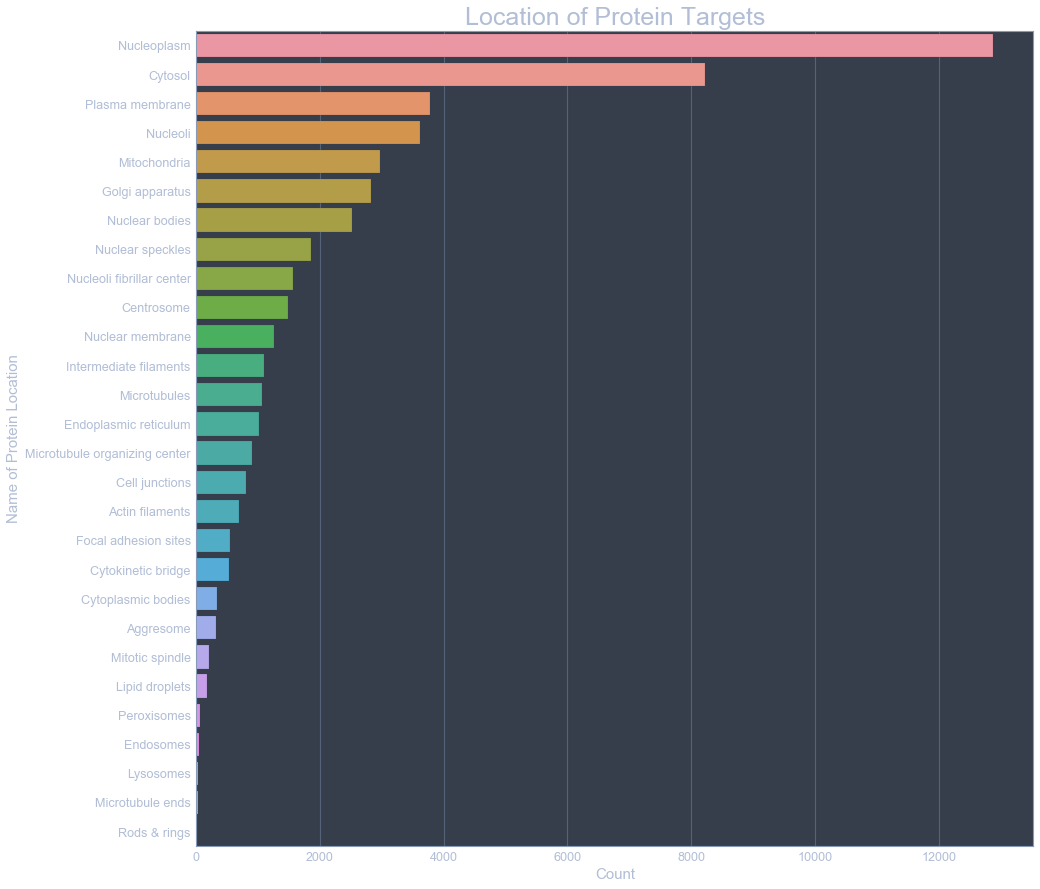

In [10]:
# Identify the total count of target labels for each organelle
proteincount_visual = train_df.drop(['Id', 'Target'],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))

from jupyterthemes import jtplot
jtplot.style(theme='onedork')

sns.barplot(y=proteincount_visual.index.values, x=proteincount_visual.values, order=proteincount_visual.index)
plt.title('Location of Protein Targets', fontsize=25)
plt.ylabel('Name of Protein Location', fontsize=15)
plt.xlabel('Count', fontsize=15)

* The most common protein structures belong to organelles like the plasma membrane, the cytosol and the nucleus. 

* The least common protein structures belong to organelles like lipid droplets, peroxisomes, endosomes, lysosomes, microtubule ends, rods and rings. For these classes, the prediction might become difficult as we have only a few examples. Due to this lack of availability, we will make less accurate predictions on these lesser-occurring classes.

* As a result, model accuracy might not be the right metric to measure performance. A validation strategy should help achieve better modeling performance.

Text(0, 0.5, 'Percentage of Data')

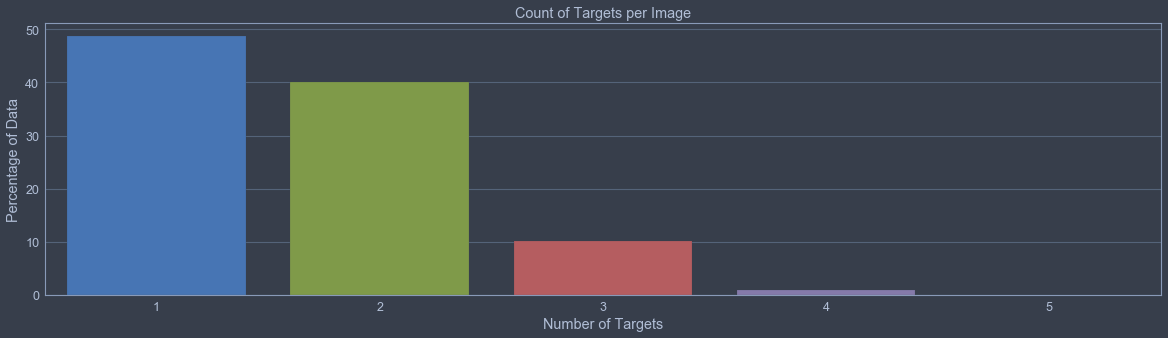

In [11]:
# Create a new column to identify number of targets as a percentage
train_df['num_of_targets'] = train_df.drop(['Id', 'Target'],axis=1).sum(axis=1)
target_count = np.round(100 * train_df['num_of_targets'].value_counts() / train_df.shape[0], 2)

# Plot the visual num_of_targets
plt.figure(figsize=(20,5))
sns.barplot(x=target_count.index.values, y=target_count.values)
plt.title('Count of Targets per Image')
plt.xlabel('Number of Targets')
plt.ylabel('Percentage of Data')

* Almost 50% of images have only 1 target
* 40% of images have 2 targets
* 10% of images have 3 targets
* < 2% of images have 4 or 5 targets

## Correlation Matrix

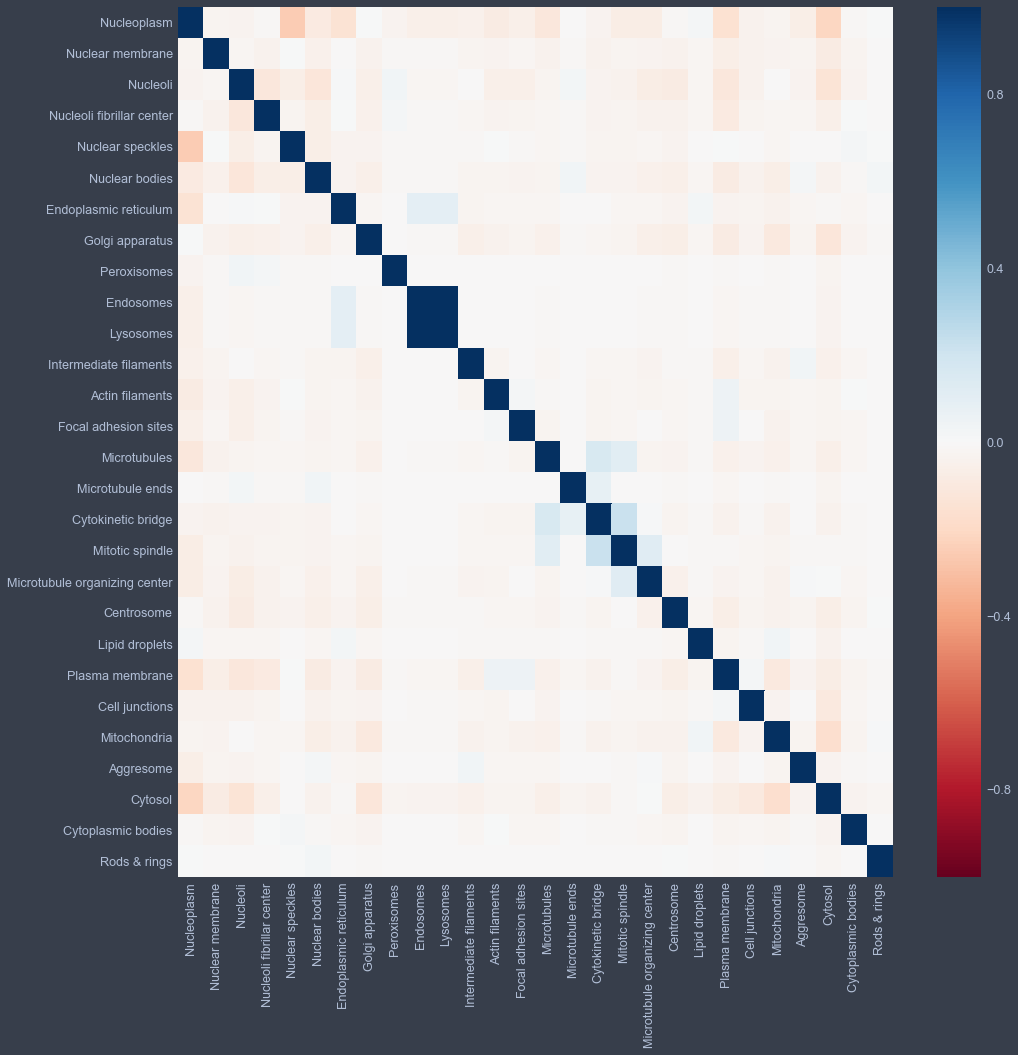

In [12]:
# Plot the correlation matrix between targets
plt.figure(figsize=(16,16))
sns.heatmap(train_df[train_df.num_of_targets>1].drop(
    ['Id', 'Target', 'num_of_targets'],axis=1).corr(), 
            cmap='RdBu', 
            vmin=-1, vmax=1)

* Most targets have little correlations with each other.
* Endosomes and Lysosomes have almost 100% correlation. This can be explained by these two organelles location - often occurring together within the Endoplasmatic Reticulum. These two membranes form a complex family of processes collectively known as endocytosis. Specifically, endocytic processes play a key role in many diseases.
* The Mitotic Spindle has the most correlation with the Cytokinetic Bridge. This occurs due to these organelles sharing a similar process during cellular division. 

## Image Analysis

Each image is actually split into 4 different image files.
These files correspond to 4 different filter types:
    * Green filter for the target protein structure of interest
    * Blue landmark filter for the nucleus
    * Red landmark filter for microtubules
    * Yellow landmark filter for the endoplasmatic reticulum
Each image a 512x512 PNG file.

In [13]:
# Print image IDs for each filter type
img_files = listdir('/Volumes/jalexander/Datasets/Human_Protein_Image_Classification/train/')
for n in range(12):
    print(img_files[n])

00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_red.png
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_yellow.png
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_blue.png
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_green.png
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_red.png
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_yellow.png
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_blue.png
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_green.png
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_red.png
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_yellow.png


In [14]:
# Check if number of files divided by 4 yields the number of target samples
len(img_files) / 4 == train_df.shape[0]

True

In [15]:
# Set train path again
train_path = '/Volumes/jalexander/Datasets/Human_Protein_Image_Classification/train/'

To view images representing the different filter types, we can build an batch loader that color maps each image (based upon its basepath _green, _red, etc.) and then iterate through each of the images that align with the target. In this example we will see images that contain the protein structures **lysosomes or endosomes**. These images were chosen because they have the highest correlation with each other and could likely be clustered later down the line. 

In [16]:
# Write a function that will load images with certain characterics
# The images are loaded based upon their color name
# Identify image shape to 4 ids, 512x512 size
def load_image(basepath, image_id):
    images = np.zeros(shape=(4,512,512))
    images[0,:,:] = imread(basepath + image_id + '_green' + '.png')
    images[1,:,:] = imread(basepath + image_id + '_red' + '.png')
    images[2,:,:] = imread(basepath + image_id + '_blue' + '.png')
    images[3,:,:] = imread(basepath + image_id + '_yellow' + '.png')
    return images

# Write a function that creates a display row for the images
# The row maps a sub axis based upon colors and sets a title 
def make_image_row(image, subax, title):
    subax[0].imshow(image[0], cmap='Greens')
    subax[1].imshow(image[1], cmap='Reds')
    subax[1].set_title('Stained Microtubules')
    subax[2].imshow(image[2], cmap="Blues")
    subax[2].set_title('Stained Nucleus')
    subax[3].imshow(image[3], cmap='Oranges')
    subax[3].set_title('Stained Endoplasmatic Reticulum')
    subax[0].set_title(title)
    return subax

# Write a function that will set titles based upon label names
# Will help add a title to each file name
def make_title(file_id):
    file_targets = train_df.loc[train_df.Id==file_id, 'Target'].values[0]
    title = ' - '
    for n in file_targets:
        title += labels[n] + ' - '
    return title

In [17]:
class TargetGroupIterator:
    
    # Write a function that takes in self, target_names, batch_size, basepath
    def __init__(self, target_names, batch_size, basepath):
        self.target_names = target_names
        self.target_list = [target_train_labels[key] for key in target_names]
        self.batch_shape = (batch_size, 4, 512, 512)
        self.basepath = basepath
    
    # Write a function that creates a new column in train_df
    # for the purpose of checking whether a specific elements are contained in the set
    def find_matching_data_entries(self):
        train_df["check_col"] = train_df.Target.apply(
            lambda l: self.check_subset(l))
        self.images_identifier = train_df[train_df.check_col==1].Id.values
        train_df.drop("check_col", axis=1, inplace=True)
    
    # Checks whether target_train_labels are contained within the set
    # Sets are unordered collections data type that is iterable, mutable, and has no duplicate elements
    # Optimized method for checking whether a specific element is contained in the set
    def check_subset(self, targets):
        return np.where(set(targets).issubset(set(self.target_list)), 1, 0)
    
    # Write a function that helps imageloader variable retrieve images
    # Identify image batch_shape to 4 ids, 512x512 size
    # Uses a for-loop that modifies the batch_shape in increments of 1
    def get_loader(self):
        filenames = []
        idx = 0
        images = np.zeros(self.batch_shape)
        for image_id in self.images_identifier:
            # Call on load_image to load imaged based upon their color name
            images[idx,:,:,:] = load_image(self.basepath, image_id)
            filenames.append(image_id)
            idx += 1
            if idx == self.batch_shape[0]:
                yield filenames, images
                filenames = []
                images = np.zeros(self.batch_shape)
                idx = 0
        if idx > 0:
            yield filenames, images          

In [18]:
# Set image choices to Lysosomes and Endosomes (most correlated)
# With a batch size of 10 
image_choice = ['Lysosomes', 'Endosomes']
image_batch_size = 10

In [19]:
# Set imageloader variable to TargetGroupIterator class and pass in
# the image_choice, image_batch_size, and train_path
imageloader = TargetGroupIterator(image_choice, image_batch_size, train_path)
# Make sure to check whether a specific elements are contained in the set
imageloader.find_matching_data_entries()
# Set imageloader variable to modify the batch_shape in increments of 1 and help imageloader variable retrieve images
iterator = imageloader.get_loader()

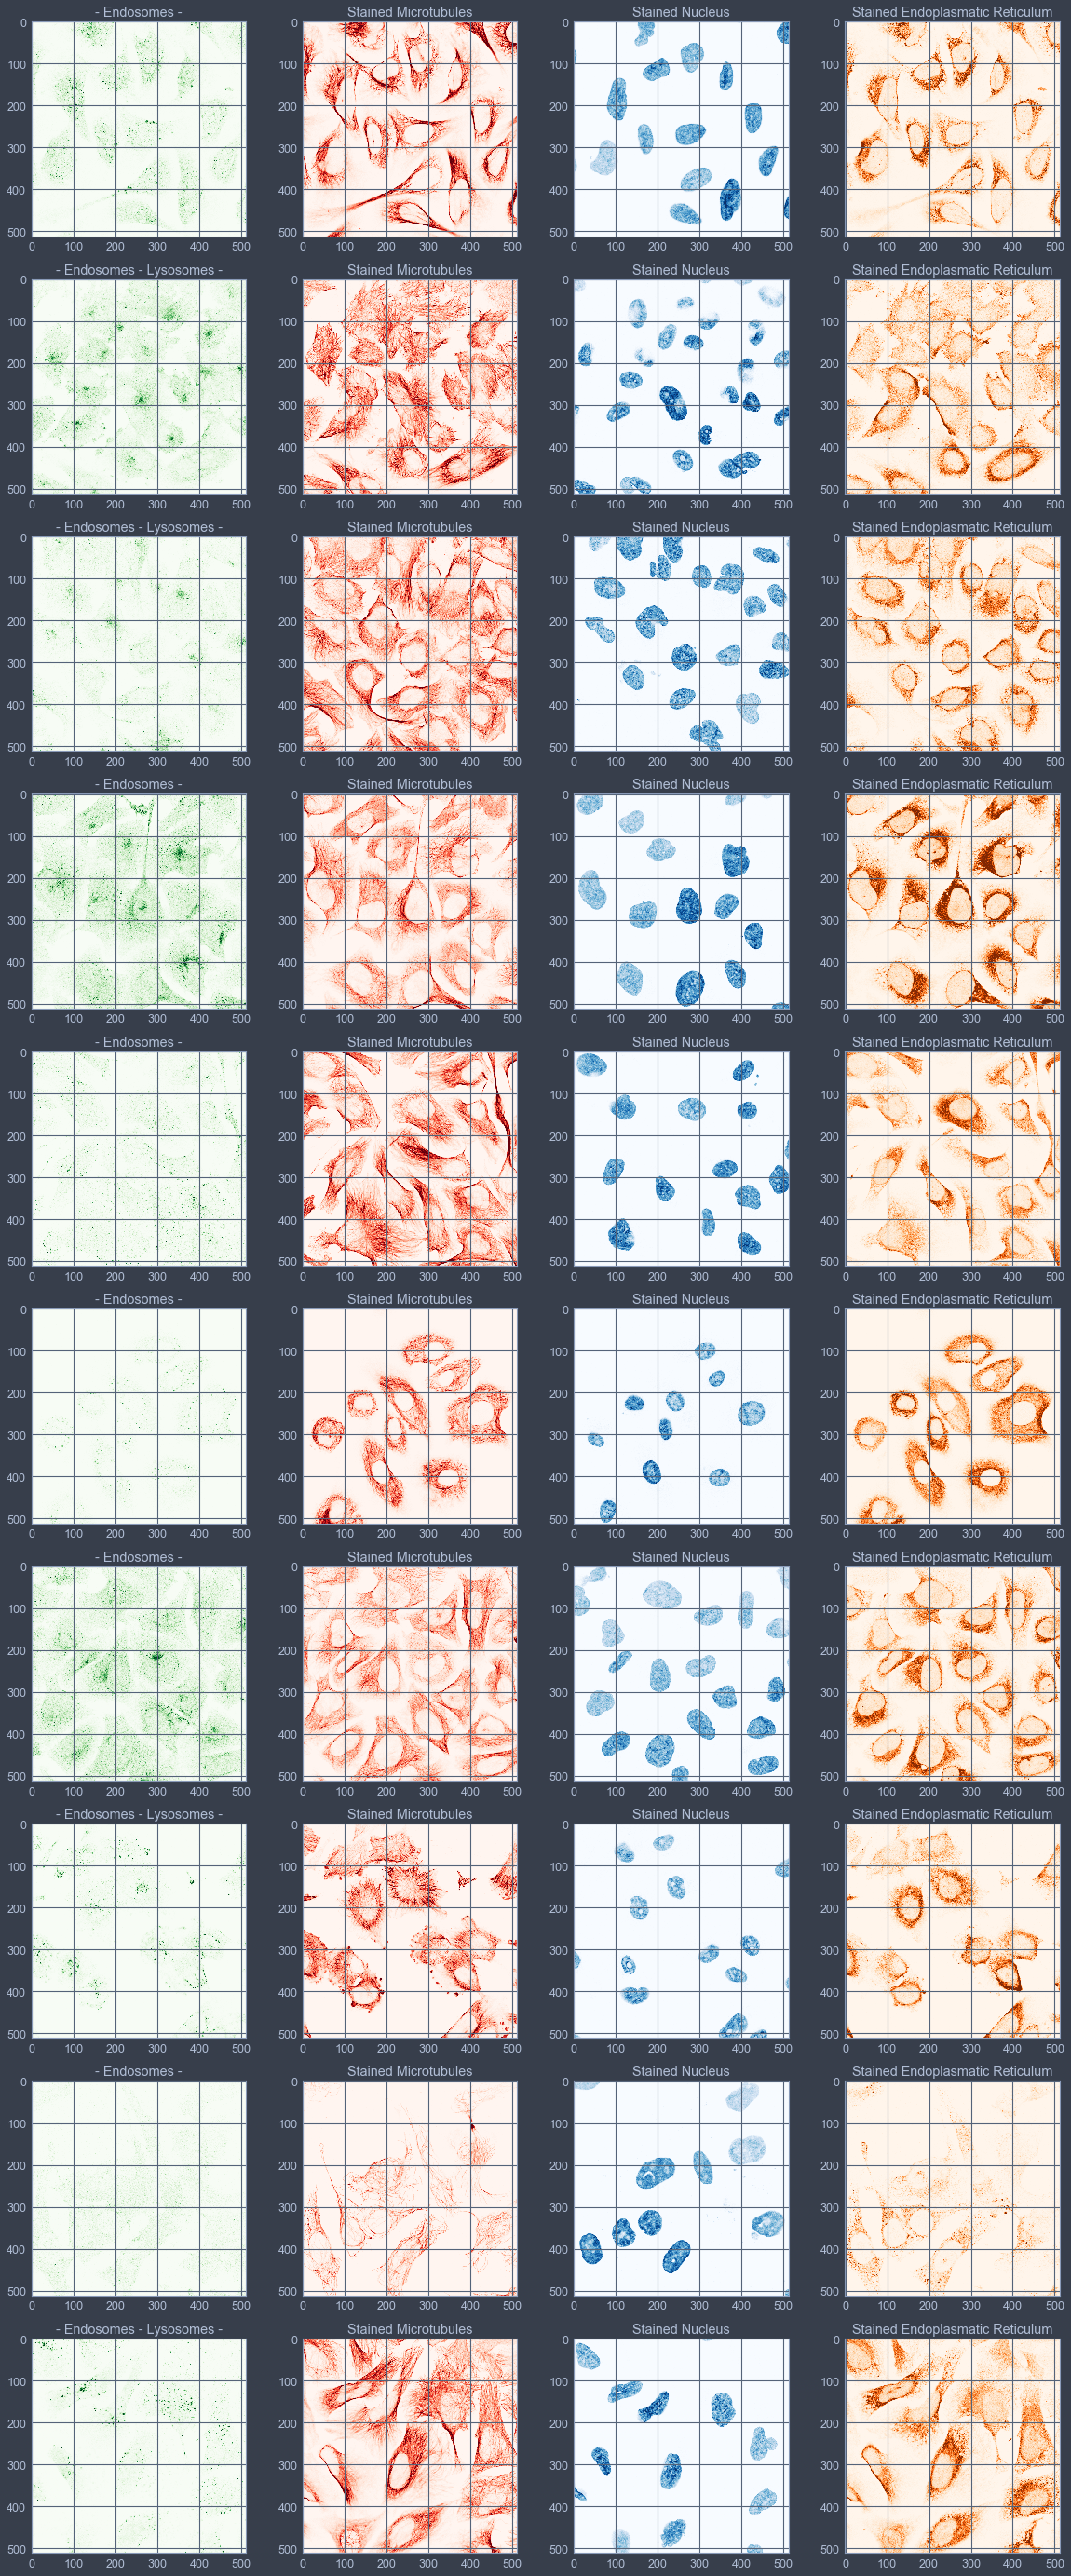

In [20]:
# The next() function returns the next item in an iterator
# Here we are setting file_ids, images to this function
file_ids, images = next(iterator)

# Plot the images using fig, ax = plt.subplots
# Debug the shape by using an if statement
fig, ax = plt.subplots(len(file_ids),4,figsize=(20,5*len(file_ids)))
if ax.shape == (4,):
    ax = ax.reshape(1,-1)
for n in range(len(file_ids)):
    # Call on make_image_row to map a sub axis based upon colors and sets a title
    # Call on make_title to add a title to each file i.d. (ex. _green, _red)
    make_image_row(images[n], ax[n], make_title(file_ids[n]))

Looking at this the example of Lysosomes and Endosomes, we can already obtain some insights:

* The staining of target proteins in the green filter was not entirely successful with each iteration. The intensities of the images differ and the target proteins are not easily locatable. In the first image, the batch_loader displays endosomes that are varied in multiple regions over the cells and in the second and third you can find endosomes and lysosomes more concetrated around the nucleus. 


* Within the red channel we can see morphological differences. It looks like if the cells are of different types. This an assumption, nevertheless one could use the red channel information to reveal cell types.  


* In addition, its important to observe that the images can contain different cell densities. Sometimes the whole image is covered with cells and sometimes there are only a few. If we like to detect same targets out of different bright images, this will cause problems as we expect them to be in a similar value range. 

# **CNN Baseline Model**

A Convolutional Neural Network (CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image, then be able to differentiate one from the other. The architecture of a CNN is analogous to that of the connectivity pattern of neurons in the human brain and was inspired by the organization of the Visual Cortex. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field. A collection of such fields overlap to cover the entire visual area.

## Data Flow

In [21]:
# Identify the path and check to see the testing size using percentage variable
train_files = listdir('/Volumes/jalexander/Datasets/Human_Protein_Image_Classification/train/')
test_files = listdir('/Volumes/jalexander/Datasets/Human_Protein_Image_Classification/test/')
percentage = np.round(len(test_files) / len(train_files) * 100)

print('The test set size is {} % of the train set'.format(percentage))

The test set size is 38.0 % of the train set


In [22]:
# Use a RepeatedKFold splitter to repeat K-Fold n times with different randomization in each repetition
# Repeated K-Fold is a cross validator
splitter = RepeatedKFold(n_splits=3, n_repeats=1, random_state=0)

This repeated kfold splitter is now a generator. Therefore, if we call the splitters split-method it will yield one fold of the repeated K-Folds. If we choose n_repeats=2 we will end up with 6 Folds in total - 3 folds for the first cross validation and then 3 folds for the repeated cross validation. We will perform the splitting on the train image ids. This way, we can easily load images and targets given the chunk ids. Due to RAM limitations, I will only use one cv-fold to explore results.

In [23]:
# Creating an empty list parts=[] and assigning train and test indicies 
# Writing a for loop that adds chunk ids for the parts list
parts = []

for train_idx, test_idx in splitter.split(train_df.index.values):
    part = {}
    part['train'] = train_df.Id.values[train_idx]
    part['validation'] = train_df.Id.values[test_idx]
    parts.append(part)
    print('TRAIN:', train_idx, 'TEST:', test_idx)
    print('TRAIN:', len(train_idx), 'TEST:', len(test_idx))

TRAIN: [    1     2     3 ... 31063 31064 31065] TEST: [    0     4     6 ... 31069 31070 31071]
TRAIN: 20714 TEST: 10358
TRAIN: [    0     4     6 ... 31069 31070 31071] TEST: [    1     2     3 ... 31060 31061 31065]
TRAIN: 20715 TEST: 10357
TRAIN: [    0     1     2 ... 31069 31070 31071] TEST: [   10    11    13 ... 31062 31063 31064]
TRAIN: 20715 TEST: 10357


In [24]:
# Parts of train[0:5]
parts[0]['train'][0:5]

array(['000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0',
       '000a9596-bbc4-11e8-b2bc-ac1f6b6435d0',
       '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0',
       '001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0',
       '002daad6-bbc9-11e8-b2bc-ac1f6b6435d0'], dtype=object)

In [25]:
# Parts of test[0:5]
parts[0]['validation'][0:5]

array(['00070df0-bbc3-11e8-b2bc-ac1f6b6435d0',
       '001838f8-bbca-11e8-b2bc-ac1f6b6435d0',
       '0020af02-bbba-11e8-b2ba-ac1f6b6435d0',
       '002679c2-bbb6-11e8-b2ba-ac1f6b6435d0',
       '00285ce4-bba0-11e8-b2b9-ac1f6b6435d0'], dtype=object)

## Model Set Up

Now we need to setup a baseline model. This will be the first step in identifying parameters and ways to improve the model. I will be using the deep learning library keras to build the baseline model.

* To begin, it's important to use only the **green channel** of images per id. The provided information of the dataset by the Human Protein Atlas indicates that it shows the stained target proteins. The other images are simply reference points revealing the microtubules, nucleus and endoplasmatic reticulum. To my knowledge it's unclear now how informative these references. Therefore they will not be included in the model as they would confuse the neural network with large unneeded weights. 


* I will build a **generator** to only load data images of our batch, therefore, I am not loading them all at once. This will be accomplished by using a Keras fit_generator, evaluate_generator, and then a predict_generator.


* Before building the model, it could be helpful to build a class that does preprocessing per image called **ImagePreprocessor**. This way, I can easily change parameters during this phase without producing chaos in the model itself or during data loading. Images will also be resized into 128x128 size to reduce dimensionality. 


* Furthermore, I will build another class called "**ModelParameters**" that holds parameters that are used or shared between the data loader, the image preprocessor and the baseline model. Passing an instance of this class will reduced the risk of setting different parameters and obtaining mismatch errors during building. 

In [26]:
# Build the ModelParameter class that holds parameters that are used
# or shared between the data loader, the image preprocessor and the baseline model
# Passes in the 28 classes, image dimensions, batch size, etc. 
class ModelParameter:
    
    def __init__(self, basepath,
                 num_classes=28,
                 image_rows=512,
                 image_cols=512,
                 batch_size=200,
                 n_channels=1,
                 row_scale_factor=4,
                 col_scale_factor=4,
                 shuffle=False,
                 n_epochs=1):
        self.basepath = basepath
        self.shuffle = shuffle
        self.num_classes = num_classes
        self.image_rows = image_rows
        self.image_cols = image_cols
        self.batch_size = batch_size
        self.n_channels = n_channels
        self.row_scale_factor = row_scale_factor
        self.col_scale_factor = col_scale_factor
        self.scaled_row_dim = np.int(self.image_rows / self.row_scale_factor)
        self.scaled_col_dim = np.int(self.image_cols / self.col_scale_factor)
        self.n_epochs = n_epochs

In [27]:
# Create an instance of a parameter and pass it to the DataGenerator, the BaseLineModel and the ImagePreprocessor.
parameter = ModelParameter(train_path)

## Dimensionality Reduction

The aim of digital image processing is to improve the image data (features) by suppressing unwanted distortions and/or enhancement of some important image features so that our deep learning models can benefit from this improved data to work on. An image is nothing more than a two-dimensional array of numbers(or pixels) ranging between 0 and 255. It is defined by the mathematical function f(x,y) where x and y are the two co-ordinates horizontally and vertically. 

In [28]:
# This class will help resize, reshape, and normalize the images
# Images will be resized into 128x128 size to reduce dimensionality
# Load image function has been used before
class ImagePreprocessor:
    
    def __init__(self, modelparameter):
        self.parameter = modelparameter
        self.basepath = self.parameter.basepath
        self.scaled_row_dim = self.parameter.scaled_row_dim
        self.scaled_col_dim = self.parameter.scaled_col_dim
        self.n_channels = self.parameter.n_channels 
    
    def preprocess(self, image):
        image = self.resize(image)
        image = self.reshape(image)
        image = self.normalize(image)
        return image
    
    # Resize the image based upon the scaled_row/col_dim within the init method
    def resize(self, image):
        image = resize(image, (self.scaled_row_dim, self.scaled_col_dim))
        return image
    
    # REshape the image based upon the numpy reshape method and pass in n_channels
    def reshape(self, image):
        image = np.reshape(image, (image.shape[0], image.shape[1], self.n_channels))
        return image
    
    # Normalize the image by 255
    def normalize(self, image):
        image /= 255 
        return image
    
    # Built previously. Loads the image basepath by image id (_green, _red, etc.)
    def load_image(self, image_id):
        image = np.zeros(shape=(512,512,4))
        image[:,:,0] = imread(self.basepath + image_id + '_green' + '.png')
        image[:,:,1] = imread(self.basepath + image_id + '_blue' + '.png')
        image[:,:,2] = imread(self.basepath + image_id + '_red' + '.png')
        image[:,:,3] = imread(self.basepath + image_id + '_yellow' + '.png')
        return image[:,:,0:self.parameter.n_channels]

In [29]:
# Create an instance of a preprocessor and pass it to the data_generator.
preprocessor = ImagePreprocessor(parameter)

(512, 512)
(128, 128, 1)


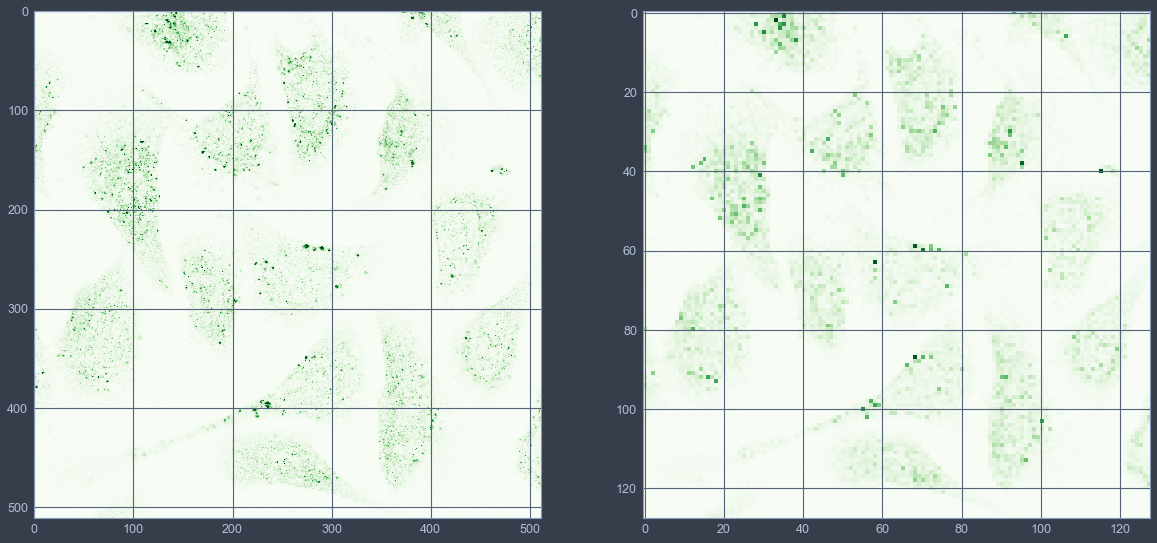

In [30]:
# Display the reduced dimensionality of an example image
example_img = images[0,0]
preprocessed = preprocessor.preprocess(example_img)
print(example_img.shape)
print(preprocessed.shape)

fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(example_img, cmap='Greens')
ax[1].imshow(preprocessed.reshape(parameter.scaled_row_dim,parameter.scaled_col_dim), cmap='Greens')

## Model and Data Generator

In [31]:
# Creating a data generator that helps the model train on batches of images
# Uses a current epoch of 1
class DataGenerator(keras.utils.Sequence):
    
    def __init__(self, list_IDs, labels, modelparameter, imagepreprocessor):
        self.current_epoch = 0
        self.params = modelparameter
        self.labels = labels
        self.list_IDs = list_IDs
        self.dim = (self.params.scaled_row_dim, self.params.scaled_col_dim)
        self.batch_size = self.params.batch_size
        self.n_channels = self.params.n_channels
        self.num_classes = self.params.num_classes
        self.shuffle = self.params.shuffle
        self.preprocessor = imagepreprocessor
        self.on_epoch_end()
    
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes, random_state=self.current_epoch)
            self.current_epoch += 1
    
    def get_targets_per_image(self, identifier):
        return self.labels.loc[self.labels.Id==identifier].drop(
                ["Id", "Target", "number_of_targets"], axis=1).values
            
    def data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size, self.num_classes), dtype=int)
        # Generate data
        for i, identifier in enumerate(list_IDs_temp):
            # Store sample
            image = self.preprocessor.load_image(identifier)
            image = self.preprocessor.preprocess(image)
            X[i] = image
            # Store class
            y[i] = self.get_targets_per_image(identifier)
        return X, y
    
    def len(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))
    
    def getitem(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        # Generate data
        X, y = self.data_generation(list_IDs_temp)
        return X, y

In [32]:
class PredictGenerator:
    
    def __init__(self, predict_Ids, imagepreprocessor, predict_path):
        self.preprocessor = imagepreprocessor
        self.preprocessor.basepath = predict_path
        self.identifiers = predict_Ids
    
    def predict(self, model):
        y = np.empty(shape=(len(self.identifiers), self.preprocessor.parameter.num_classes))
        for n in range(len(self.identifiers)):
            image = self.preprocessor.load_image(self.identifiers[n])
            image = self.preprocessor.preprocess(image)
            image = image.reshape((1, *image.shape))
            y[n] = model.predict(image)
        return y

In [33]:
class BaseLineModel:
    
    def __init__(self, modelparameter):
        self.params = modelparameter
        self.num_classes = self.params.num_classes
        self.img_rows = self.params.scaled_row_dim
        self.img_cols = self.params.scaled_col_dim
        self.n_channels = self.params.n_channels
        self.input_shape = (self.img_rows, self.img_cols, self.n_channels)
        self.my_metrics = ['accuracy']
    
    def build_model(self):
        self.model = Sequential()
        self.model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=self.input_shape,
                             kernel_initializer=VarianceScaling(seed=0)))
        self.model.add(Conv2D(32, (3, 3), activation='relu',
                             kernel_initializer=VarianceScaling(seed=0)))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(0.25))
        self.model.add(Flatten())
        self.model.add(Dense(64, activation='relu',
                            kernel_initializer=VarianceScaling(seed=0),))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(self.num_classes, activation='sigmoid'))
    
    def compile_model(self):
        self.model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=self.my_metrics)
    
    def set_generators(self, train_generator, validation_generator):
        self.training_generator = train_generator
        self.validation_generator = validation_generator
    
    def learn(self):
        return self.model.fit_generator(generator=self.training_generator,
                    validation_data=self.validation_generator,
                    epochs=self.params.n_epochs, 
                    use_multiprocessing=True,
                    workers=8)
    
    def score(self):
        return self.model.evaluate_generator(generator=self.validation_generator,
                                      use_multiprocessing=True, 
                                      workers=8)
    
    def predict(self, predict_generator):
        y = predict_generator.predict(self.model)
        return y
    
    def save(self, modeloutputpath):
        self.model.save(modeloutputpath)
    
    def load(self, modelinputpath):
        self.model = load_model(modelinputpath)

In [34]:
# Loading train and test datasets in another format
part = parts[0]
labels = train_df

print('Number of samples in train: {}'.format(len(part['train'])))
print('Number of samples in validation: {}'.format(len(part['validation'])))

Number of samples in train: 20714
Number of samples in validation: 10358


In [35]:
# Creating a train and validation generator
train_generator = DataGenerator(part['train'], labels, parameter, preprocessor)
validation_generator = DataGenerator(part['validation'], labels, parameter, preprocessor)

In [36]:
# Creating a predictor generator
predict_generator = PredictGenerator(part['validation'], preprocessor, train_path)

In [37]:
# Reading the testing df and printing the number of items and the first id
test_df = pd.read_csv('/Volumes/jalexander/Datasets/Human_Protein_Image_Classification/test.csv')
test_names = test_df.Id.values
print(len(test_names))
print(test_names[0])

11702
00008af0-bad0-11e8-b2b8-ac1f6b6435d0


In [38]:
# Printing the head of the test_df 
test_df.head()

Id  Predicted
0  00008af0-bad0-11e8-b2b8-ac1f6b6435d0          0
1  0000a892-bacf-11e8-b2b8-ac1f6b6435d0          0
2  0006faa6-bac7-11e8-b2b7-ac1f6b6435d0          0
3  0008baca-bad7-11e8-b2b9-ac1f6b6435d0          0
4  000cce7e-bad4-11e8-b2b8-ac1f6b6435d0          0

In [39]:
# Creating an instance of the image processor and predict generator and passing in the train and test df
test_preprocessor = ImagePreprocessor(parameter)
model_predict_generator = PredictGenerator(test_names, test_preprocessor, test_df)

In [40]:
# Dropping a few columns from the train_df 
target_names = train_df.drop(['Target', 'num_of_targets', 'Id'], axis=1).columns

## Kernel Settings

Kernel based deep learning algorithms are typically applied to data that is not linearly separable in its original space. The deep kernel method is currently utilized in classification, and dimension reduction and visualization. The deep kernel is shown to be more powerful in dimension reduction and visualization. 

In [41]:
class KernelSettings:
    
    def __init__(self, fit_baseline=False,
                 fit_improved_baseline=True,
                 fit_improved_higher_batchsize=False,
                 fit_improved_without_dropout=False):
        self.fit_baseline = fit_baseline
        self.fit_improved_baseline = fit_improved_baseline
        self.fit_improved_higher_batchsize = fit_improved_higher_batchsize
        self.fit_improved_without_dropout = fit_improved_without_dropout

In [42]:
kernelsettings = KernelSettings(fit_baseline=False,
                                fit_improved_baseline=False,
                                fit_improved_higher_batchsize=False,
                                fit_improved_without_dropout=False)

In [43]:
if kernelsettings.fit_baseline == True:
    
    model = BaseLineModel(parameter)
    model.build_model()
    model.compile_model()
    model.set_generators(training_generator, validation_generator)
    history = model.learn()
    
    proba_predictions = model.predict(predict_generator)
    baseline_proba_predictions = pd.DataFrame(index = part['validation'],
                                              data=proba_predictions,
                                              columns=target_names)
    
    baseline_proba_predictions.to_csv('baseline_predictions.csv')
    baseline_losses = pd.DataFrame(history.history['loss'], columns=['train_loss'])
    baseline_losses['val_loss'] = history.history['val_loss']
    baseline_losses.to_csv('baseline_losses.csv')
    
    
    test_proba_predictions = model.predict(test_predict_generator)
    baseline_labels = test_labels.copy()
    baseline_labels.loc[:, test_labels.drop(['Id', 'Target'], axis=1).columns.values] = test_proba_predictions
    baseline_labels.to_csv('baseline_test_proba.csv')
    
else:
    baseline_proba_predictions = pd.read_csv('/Volumes/jalexander/Datasets/Human_Protein_Image_Classification/baseline_predictions.csv', index_col=0)
    baseline_losses = pd.read_csv('/Volumes/jalexander/Datasets/Human_Protein_Image_Classification/baseline_losses.csv', index_col=0)
    baseline_labels = pd.read_csv('/Volumes/jalexander/Datasets/Human_Protein_Image_Classification/baseline_submission_proba.csv', index_col=0)

## Model Score

In [44]:
# Explore the shape of the test dataframe
validation_labels = train_df.loc[train_df.Id.isin(part['validation'])].copy()
validation_labels.shape

(10358, 31)

In [45]:
# Explore the shape of the model dataframe
baseline_proba_predictions.shape

(10358, 28)

In [46]:
y_true = validation_labels.drop(['Id', 'Target', 'num_of_targets'], axis=1).values
y_pred = np.where(baseline_proba_predictions.values > 0.5, 1, 0)

accuracy(y_true.flatten(), y_pred.flatten())

0.9413152015005655

In [47]:
y_pred[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [48]:
y_true[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [49]:
proba_predictions = baseline_proba_predictions.values
hot_values = validation_labels.drop(['Id', 'Target', 'num_of_targets'], axis=1).values.flatten()
one_hot = (hot_values.sum()) / hot_values.shape[0] * 100
zero_hot = (hot_values.shape[0] - hot_values.sum()) / hot_values.shape[0] * 100

Text(0, 0.5, 'Density')

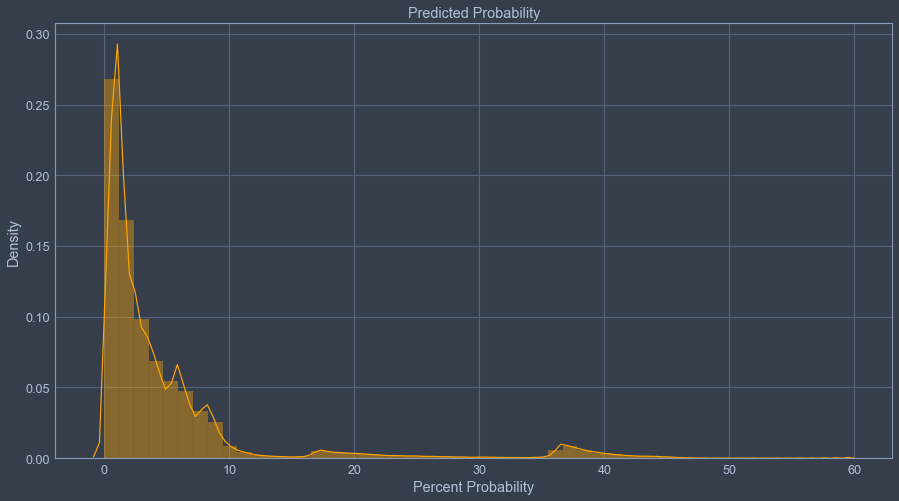

In [50]:
# Check the probability density
plt.figure(figsize=(15,8))
sns.distplot(proba_predictions.flatten() * 100, color='orange')
plt.title('Predicted Probability')
plt.xlabel('Percent Probability')
plt.ylabel('Density')

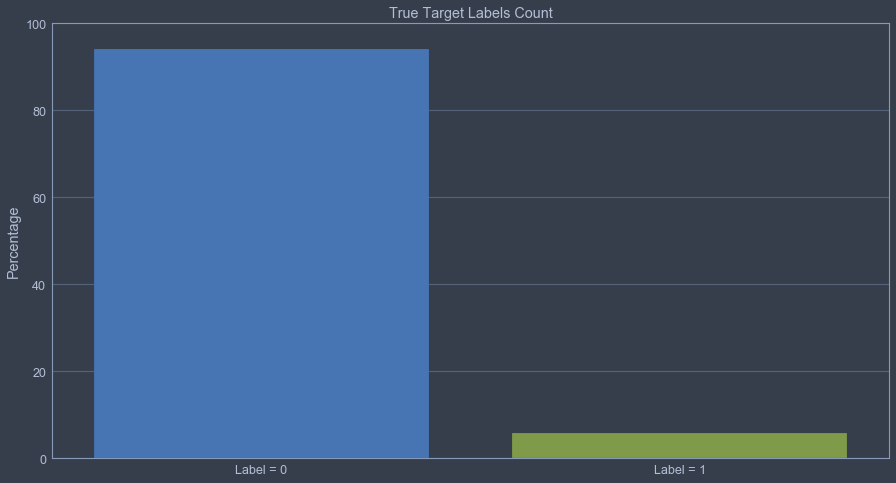

In [51]:
# Check how many labels were given for each category
plt.figure(figsize=(15,8))
sns.barplot(x=['Label = 0', 'Label = 1'], y=[zero_hot, one_hot])
plt.ylim([0,100])
plt.title('True Target Labels Count')
plt.ylabel('Percentage');

* **Major Problem**: Notice the baseline model was clearly uncertain to predict the presence of a target protein. Based upon the density function, most probabilities are close to zero. There are only a few with targets where the model predicted a protein structure with higher than 10%.


* Looking at the true target label count, we can see that most of the targets are filled with zeros (over 90%). This corresponds to an absence of corresponding target proteins. This makes sense because based upon EDA, for each image, we have a high probability (Almost 90%) to contain either 1 or 2 target protein structures. These label values are one whereas all others are zero. 


* Consequently, the high accuracy belongs to a correct prediction of the **absence** of target proteins. As a result, we weren't able to predict the **presence** of a target protein.

In [52]:
baseline_proba_predictions.head()

Nucleoplasm  Nuclear membrane  Nucleoli  \
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     0.382274          0.031677  0.090324   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0     0.363591          0.026173  0.078750   
0020af02-bbba-11e8-b2ba-ac1f6b6435d0     0.415328          0.023347  0.088845   
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0     0.374224          0.023214  0.075395   
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0     0.369011          0.023171  0.074307   

                                      Nucleoli fibrillar center  \
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0                   0.068501   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0                   0.064864   
0020af02-bbba-11e8-b2ba-ac1f6b6435d0                   0.036047   
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0                   0.052411   
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0                   0.055710   

                                      Nuclear speckles  Nuclear bodies  \
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0          0.048415        0.066611   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0          0.042244        0.056948   
0020af02-bbba-11e8-b2ba-ac1f6b6435d0          0.034017        0.054595   
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0          0.036757        0.051885   
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0          0.038037        0.053059   

                                      Endoplasmic reticulum  Golgi apparatus  \
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0               0.028999         0.063961   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0               0.021876         0.057294   
0020af02-bbba-11e8-b2ba-ac1f6b6435d0               0.026125         0.039157   
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0               0.020246         0.049594   
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0               0.020271         0.051126   

                                      Peroxisomes  Endosomes  ...  \
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     0.001195   0.015697  ...   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0     0.000728   0.011182  ...   
0020af02-bbba-11e8-b2ba-ac1f6b6435d0     0.000836   0.014700  ...   
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0     0.000614   0.010556  ...   
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0     0.000628   0.010330  ...   

                                      Microtubule organizing center  \
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0                       0.030099   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0                       0.024196   
0020af02-bbba-11e8-b2ba-ac1f6b6435d0                       0.029175   
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0                       0.022491   
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0                       0.021624   

                                      Centrosome  Lipid droplets  \
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0    0.042614        0.002936   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0    0.033006        0.001952   
0020af02-bbba-11e8-b2ba-ac1f6b6435d0    0.041546        0.002194   
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0    0.031384        0.001702   
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0    0.032142        0.001714   

                                      Plasma membrane  Cell junctions  \
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0         0.076902        0.018996   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0         0.058828        0.014157   
0020af02-bbba-11e8-b2ba-ac1f6b6435d0         0.123175        0.012394   
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0         0.063808        0.012144   
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0         0.062074        0.012687   

                                      Mitochondria  Aggresome   Cytosol  \
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0      0.092924   0.013699  0.207928   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0      0.083606   0.011467  0.172955   
0020af02-bbba-11e8-b2ba-ac1f6b6435d0      0.072401   0.006334  0.323191   
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0      0.078086   0.009152  0.193138   
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0      0.077853   0.009372  0.184957   

                                      Cytoplasmic bodies  Rods & rings  
00070df0

In [74]:
baseline_proba_predictions['Nucleoplasm'].mean()

0.3878469215722175

In [75]:
baseline_proba_predictions['Plasma membrane'].mean()

0.08835705436031016

In [76]:
baseline_proba_predictions['Cytosol'].mean()

0.2357375856275309

# **CNN Improved Model**

Due to the false accuracy of the previous model, there are some improvements to be made to the CNN model. Again, a CNN takes in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image, then be able to differentiate one from the other. Here we will be focusing on class imbalance.  To start on an improvement model, let's choose the most common target proteins that are present in our data: **nucleoplasm, cytosol and plasma membrane**. For this purpose, we will extend the class we have already written, the function data_generation.

## Class Imbalance

In [53]:
balancer = ["Nucleoplasm", "Cytosol", "Plasma membrane"]

In [54]:
class ImprovedDataGenerator(DataGenerator):
    
    # In contrast to the original DataGenerator, we add a target balancer to init
    def __init__(self, list_IDs, labels, modelparameter, imagepreprocessor, target_balancer):
        super().__init__(list_IDs, labels, modelparameter, imagepreprocessor)
        self.target_balancer = target_balancer
    
    def get_targets_per_image(self, identifier):
        return self.labels.loc[self.labels.Id==identifier][self.target_balancer].values

## Adding Scoring Metrics

We saw that accuracy score for this classification problem is misleading and doesn't properly indicate the success in classification. Let's take a closer look to alternatives in computational scoring:

* **F1 micro score**: Micro and Macro-averages will compute slightly different things, and thus their interpretation differs. A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).


* We have 28 different classes that are very different in their frequency.  In addition, we have to deal with highly imbalanced classes per single target. Even for the most common target nucleoplasm, this includes only 40% of samples. This imbalance becomes even more dramatic for seldom targets like rods and rings. We should attach more importance to true positives. 


* It could also be important to introduce further statistical quantities like F1 min, F1 max and the F1 standard deviation. In this manner, we will be able to identify the worst performing classes and gain more insight on how the scores are spread.

In [55]:
# Function taken from GitHub user skywalker212, Akash Gajjar
def base_f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return f1

# Writing function for F1 min score
def f1_min(y_true, y_pred):
    f1 = base_f1(y_true, y_pred)
    return K.min(f1)

# Writing function for F1 max score
def f1_max(y_true, y_pred):
    f1 = base_f1(y_true, y_pred)
    return K.max(f1)

# Writing function for F1 mean score
def f1_mean(y_true, y_pred):
    f1 = base_f1(y_true, y_pred)
    return K.mean(f1)

# Writing function for F1 std score
def f1_std(y_true, y_pred):
    f1 = base_f1(y_true, y_pred)
    return K.std(f1)

In [56]:
#  Loss values for train and validation data the notebook saved after learning
baseline_losses.head()

train_loss  val_loss
0    0.296079  0.176491

Validation loss is the same metric as training loss, but it is not used to update the weights. It's a measurement of how far off the observations were at the current epoch. Neural networks (and other model types) typically use a validation set on every epoch, because training too long can cause over-fitting, and models don't recover from that, they just get worse form that point on. So it can save a lot of wasted effort to monitor validation loss, and stop training when it has not improved for a long while, or starts to get worse.

## Model Improvement

Based upon the loss, we might need more than 1 epoch to learn the pattern in the data. Computing the gradient with batches is a **stochastic process** meaning, depending on the batch samples, the gradient leads to some improvement in the weight space. This becomes more robust with more samples per batch. However, typically you need add even more epochs as there is an increasing in learning steps.

In [57]:
class TrackHistory(keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [58]:
class ImprovedModel(BaseLineModel):
    
    def __init__(self, modelparameter,
                 use_dropout,
                 my_metrics=[f1_mean, f1_std, f1_min, f1_max]):
        
        super().__init__(modelparameter)
        self.my_metrics = my_metrics
        self.use_dropout = use_dropout
        
    def learn(self):
        self.history = TrackHistory()
        return self.model.fit_generator(generator=self.training_generator,
                    validation_data=self.validation_generator,
                    epochs=self.params.n_epochs, 
                    use_multiprocessing=True,
                    workers=8,
                    callbacks = [self.history])
    
    def build_model(self):
        self.model = Sequential()
        self.model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=self.input_shape,
                             kernel_initializer=VarianceScaling(seed=0),))
        self.model.add(Conv2D(32, (3, 3), activation='relu',
                             kernel_initializer=VarianceScaling(seed=0),))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        if self.use_dropout:
            self.model.add(Dropout(0.25))
        self.model.add(Flatten())
        self.model.add(Dense(64, activation='relu',
                            kernel_initializer=VarianceScaling(seed=0),))
        if self.use_dropout:
            self.model.add(Dropout(0.5))
        self.model.add(Dense(self.num_classes, activation='sigmoid'))

Now to increase the number of epochs and decrease the batch_size. This way we use more weight update steps and make the model learn more than before.

In [59]:
parameter = ModelParameter(train_path, num_classes=len(balancer), n_epochs=5, batch_size=64)
preprocessor = ImagePreprocessor(parameter)
labels = train_df

In [60]:
training_generator = ImprovedDataGenerator(part['train'], labels,
                                           parameter, preprocessor, balancer)
validation_generator = ImprovedDataGenerator(part['validation'], labels,
                                             parameter, preprocessor, balancer)
predict_generator = PredictGenerator(part['validation'], preprocessor, train_path)

In [61]:
test_preprocessor = ImagePreprocessor(parameter)
test_predict_generator = PredictGenerator(test_names, test_preprocessor, test_files)

In [62]:
if kernelsettings.fit_improved_baseline == True:
    model = ImprovedModel(parameter, use_dropout=use_dropout)
    model.build_model()
    model.compile_model()
    model.set_generators(training_generator, validation_generator)
    epoch_history = model.learn()
    proba_predictions = model.predict(predict_generator)
    #model.save("improved_model.h5")
    
    improved_proba_predictions = pd.DataFrame(proba_predictions, columns=wishlist)
    improved_proba_predictions.to_csv('improved_predictions.csv')
    improved_losses = pd.DataFrame(epoch_history.history['loss'], columns=['train_loss'])
    improved_losses['val_loss'] = epoch_history.history["val_loss"]
    improved_losses.to_csv('improved_losses.csv')
    improved_batch_losses = pd.DataFrame(model.history.losses, columns=['batch_losses'])
    improved_batch_losses.to_csv('improved_batch_losses.csv')
    
    improved_submission_proba_predictions = model.predict(submission_predict_generator)
    improved_test_labels = test_labels.copy()
    improved_test_labels.loc[:, wishlist] = improved_submission_proba_predictions
    improved_test_labels.to_csv('improved_submission_proba.csv')
    
# If you already have done a baseline fit once, 
# you can load predictions as csv and further fitting is not neccessary:
else:
    improved_proba_predictions = pd.read_csv("/Volumes/jalexander/Datasets/Human_Protein_Image_Classification/improved_predictions.csv", index_col=0)
    improved_losses= pd.read_csv("/Volumes/jalexander/Datasets/Human_Protein_Image_Classification/improved_losses.csv", index_col=0)
    improved_batch_losses = pd.read_csv("/Volumes/jalexander/Datasets/Human_Protein_Image_Classification/improved_batch_losses.csv", index_col=0)
    improved_test_df = pd.read_csv("/Volumes/jalexander/Datasets/Human_Protein_Image_Classification/improved_submission_proba.csv",
                                      index_col=0)

In [63]:
y_pred = np.where(improved_proba_predictions.values > 0.5, 1, 0)

In [64]:
y_pred[0:10]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

## Model Visualizations

Text(0.5, 1.0, 'Training loss per Batch')

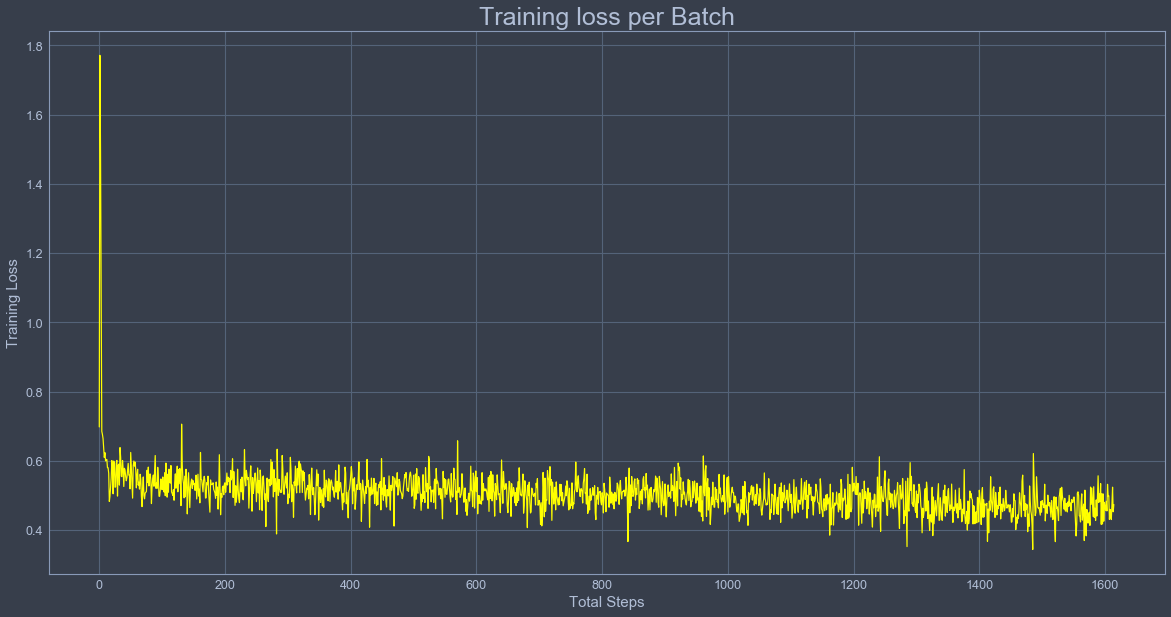

In [65]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
plt.figure(figsize=(20,10))
plt.plot(improved_batch_losses.batch_losses.values, label='train_batch_losses', color='yellow')
plt.xlabel('Total Steps', fontsize=15)
plt.ylabel('Training Loss', fontsize=15)
plt.title('Training Loss per Batch', fontsize=25)

The loss is noisy. When decreasing the batch size, we increased the number of learning steps. The model learns faster. However, with a smaller batch size there are fewer samples to learn from. The gradients we obtain may be specific to the images and class labels that are covered by the batch of the current learning step. That was a tradeoff we made. We gained more learning speed but sacrificed gradient quality.

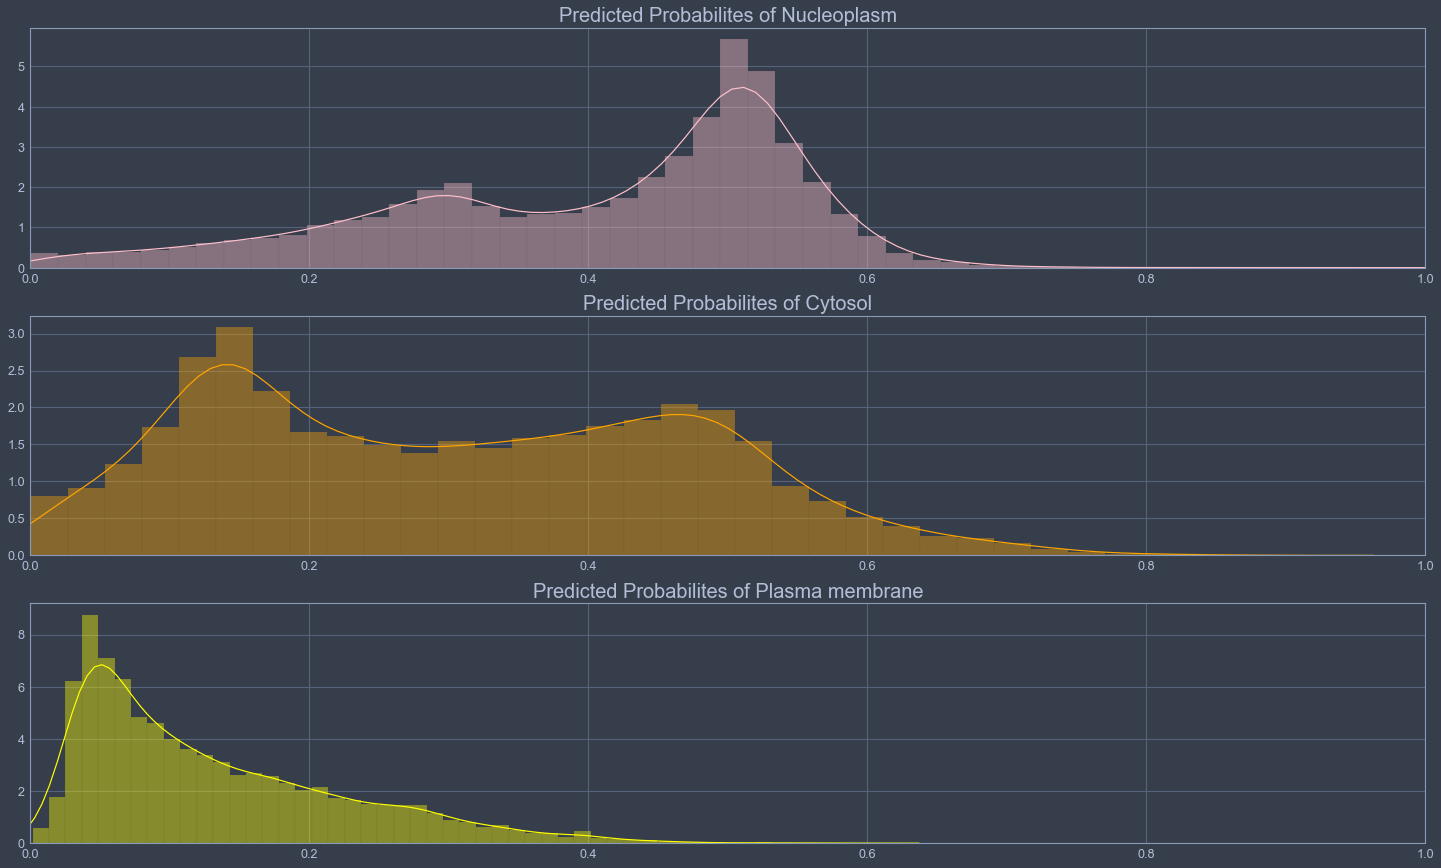

In [66]:
fig, ax = plt.subplots(3,1,figsize=(25,15))

sns.distplot(improved_proba_predictions.values[:,0], color='Pink', ax=ax[0])
ax[0].set_title('Predicted Probabilites of {}'.format(improved_proba_predictions.columns.values[0]), fontsize=20)
ax[0].set_xlim([0,1])

sns.distplot(improved_proba_predictions.values[:,1], color='Orange', ax=ax[1])
ax[1].set_title('Predicted Probabilites of {}'.format(improved_proba_predictions.columns.values[1]), fontsize=20)
ax[1].set_xlim([0,1])

sns.distplot(improved_proba_predictions.values[:,2], color='Yellow', ax=ax[2])
ax[2].set_title('Predicted Probabilites of {}'.format(improved_proba_predictions.columns.values[2]), fontsize=20)
ax[2].set_xlim([0,1]);

These distributions are much better than the ones we obtained with the baseline model. Thus increasing epochs while decreasing the batch size helped our model as we made more learning steps. Nevertheless, we can still see much noise after 100 batches during loss decrease. Consequently, we make large jumps in weight space with each update step.

In [67]:
improved_test_df.head()

Id  Target  Nucleoplasm  \
0  00008af0-bad0-11e8-b2b8-ac1f6b6435d0       0     0.235571   
1  0000a892-bacf-11e8-b2b8-ac1f6b6435d0       0     0.315245   
2  0006faa6-bac7-11e8-b2b7-ac1f6b6435d0       0     0.533483   
3  0008baca-bad7-11e8-b2b9-ac1f6b6435d0       0     0.447686   
4  000cce7e-bad4-11e8-b2b8-ac1f6b6435d0       0     0.355946   

   Nuclear membrane  Nucleoli  Nucleoli fibrillar center  Nuclear speckles  \
0                 0         0                          0                 0   
1                 0         0                          0                 0   
2                 0         0                          0                 0   
3                 0         0                          0                 0   
4                 0         0                          0                 0   

   Nuclear bodies  Endoplasmic reticulum  Golgi apparatus  ...  \
0               0                      0                0  ...   
1               0                      0                0  ...   
2               0                      0                0  ...   
3               0                      0                0  ...   
4               0                      0                0  ...   

   Microtubule organizing center  Centrosome  Lipid droplets  Plasma membrane  \
0                              0           0               0         0.034383   
1                              0           0               0         0.066488   
2                              0           0               0         0.448640   
3                              0           0               0         0.062800   
4                              0           0               0         0.034634   

   Cell junctions  Mitochondria  Aggresome   Cytosol  Cytoplasmic bodies  \
0               0             0          0  0.120837                   0   
1               0             0          0  0.214535                   0   
2               0             0          0  0.700123                   0   
3               0             0          0  0.186939                   0   
4               0             0          0  0.098083                   0   

   Rods & rings  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 30 columns]

In [69]:
improved_test_df['Nucleoplasm'].mean()

0.4048984221271821

In [72]:
improved_test_df['Plasma membrane'].mean()

0.12166904353323095

In [73]:
improved_test_df['Cytosol'].mean()

0.2891008413591914

# **Conclusion**

In this project, I worked with the Human Protein Atlas (HPA) image classification dataset. The goal of this project was to develop a model using deep learning techniques that are capable of classifying mixed patterns of proteins in microscope images. The imagery was acquired in a highly standardized way using confocal microscopy - an optical imaging technique for increasing optical resolution and contrast of a micrograph by means of using a spatial pinhole to block out-of-focus light in image formation. Thanks to advances in microscopy, protein images are generated at a far greater pace than what can be manually evaluated. Therefore, the need is greater than ever for automating biomedical image analysis to accelerate the understanding of human cells and disease. Historically, classification of proteins has been limited to single patterns in one or a few cell types, but in order to fully understand the complexity of the human cell, models must classify mixed patterns across a range of different human cells.

This project involved 28 different mixed protein pattern locations and 27 different cell types. Given the training data, multiple proteins can be present in one image resulting in a classification problem called multi-label classification. In multi-label classification, the training set is composed of instances each associated with a set of labels, and the task is to predict the label sets of unseen instances through analyzing training instances with known label sets. Specific to this project, target proteins can be found in multiple areas within the cell, therefore, identifying the patterns in which these proteins are found is the objective for the deep learning model. 

The deep learning model used is a Convolutional Neural Network (CNN). A Convolutional Neural Network is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image, then be able to differentiate one from the other. The architecture of a CNN is analogous to that of the connectivity pattern of Neurons in the Human Brain and was inspired by the organization of the Visual Cortex. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field. A collection of such fields overlap to cover the entire visual area.

## Challenges 

* Multi-label classification is inherently difficult. For example, *multi-class* classification makes the assumption that each sample is assigned to one and only one label: a fruit can be either an apple or a pear but not both at the same time. Whereas, an instance of *multi-label* classification can be that a text might be about any of religion, politics, finance or education at the same time or none of these. For the project, protein patterns could be classified within many locations within a cell, or no locations. With the initial baseline CNN model, we experienced a misleading accuracy score. The high accuracy belonged to a correct prediction of the absence of target proteins. As a result, we weren't able to predict the presence of a target protein.


* Images were taken under different filter types. However initially, the images provided in the dataset are black and white. During confocal microscopy, proteins of interest were stained in a green filter. The three cellular landmarks of the nucleus (blue), microtubules (red), endoplasmic reticulum (yellow) were each stained a different color as well. In order to provide an analysis of the images during EDA, I built several functions and one class to ensure the images were loaded in the proper format and with the accurate filter type. 


* Due to the larger sizes of images, 512x512, the project needed dimensionality reduction in order for the model to train properly without overloading computer processing power. To solve this, I built an image preprocessing class that reshaped the image size to 128x128. This specific size was small enough to save processing power, but large enough to save important information regarding the protein locations. 


* Class imbalance regarding the CNN baseline model provided a misleading score. Initially, after performing cross validation, the y_pred vs. y_true accuracy scored a 94%. An amazing score for such a complex model. Digging deeper however, it's revealed that the high accuracy belongs to a correct prediction of the absence of target proteins. As a result, we weren't able to predict the presence of a target protein.

## Solutions

* To initially formulate a dataframe with individual label targets, I built a function called **targetlabels** that added a column for each individual label. So now instead of one column in the initial csv, each label has it's own column. The dataframe now has 30 columns and represents the 28 possible protein pattern locations. 


* To solve the filter problem indicated above, I built several functions and one class called **TargetGroupIterator** to ensure the images were loaded in the proper format and with the accurate filter type. To view images representing the different filter types, a batchloader was created to color maps each image (based upon its basepath _green, _red, etc.) and then iterates through each of the images that align with the target.


* To be trained on, the images needed to be loaded in a specific way so each image_id (there are four images per each id) appeared at the same time of training. Also needed to include cross-validation at this time. To perform the splitting on the train image ids, I used a repeated kfold splitter. In this way, I could easily load images and targets given the chunk ids. Though, due to RAM limitations, I used one cv-fold to explore results.


* It was important to use only the green channel of images per id. The provided information of the dataset by the Human Protein Atlas indicates that it shows the stained target proteins. The other images are simply reference points revealing the microtubules, nucleus, and endoplasmatic reticulum. 


* To solve the dimensionality problem, I built an image preprocessing class that reshaped the image size to 128x128. The aim of this was to improve the image data (features) by suppressing unwanted distortions so that our deep learning models can benefit from this improved data to work on.


* Due to the false accuracy of the previous model, there was improvements to be made to the CNN model. Here, I focused on class imbalance. To start as improvement model, I chose the top three features (in terms of presence in the data) **nucleoplasm, cytosol and plasma membrane** and built a model that only tries to classify these three features.

## Recommendations

* Mixed protein clusters occur in many areas around the cell. However, many clusters can be found around the nucleus and the processes that occur within the cytosol. This nucleus has two major functions: it stores the cell's hereditary material, or DNA, and it coordinates the cell's activities which includes intermediary metabolism, protein synthesis, and cell division.


* Protein are also commonly forming on the edges of cells. For example, the plasma membrane. the primary function of the plasma membrane is to protect the cell from its surroundings. Composed of a phospholipid bilayer with embedded proteins, the plasma membrane is selectively permeable to ions and organic molecules and regulates the movement of substances in and out of cells. 


* Overall, building a model that classifies multi-labeled imaging takes significant preprocessing and that should be accounted for when building a project plan. It would be beneficial to have several functions handy for the purpose of easy calling these functions to reduce dimensionality, batch-loading, kernel settings, and building parameters. 

## Further Work

* Continue building an effective CNN model with that battles inefficient class imbalances. 


* Perform target group analysis using a Latent Variable model.


* Perform Bernoulli Mixture model to target groups found by clustering.


* Building visualizations that show mixed protein clusters within each cell. 